# Notebook 2-3 Clasification Model and ROC

Readme: In this notebook, clasification model is implemented.

- **Classification Method this notebook:** Logistic Regression

- **Performance Metrics**:

    - ROC curve

    - Confusion Martix

    - Recall

Note: Different method has different ways to evaluate.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

traindata = pd.read_csv("Trainset_with_cluster_label.csv").dropna()
testdata = pd.read_csv("Testset_with_cluster_label.csv").dropna()


In [2]:
import os
print(os.getcwd())

d:\Projects\MSc_DE_GroupWork4\Scripts


In [3]:
traindata.columns

Index(['Engine Size(L)', 'Cylinders', 'Gearbox_Type', 'Gearbox_Number',
       'Energy Consumption per Distance MJ/100km',
       'Model Features_Flexible-fuel vehicle',
       'Model Features_Four-wheel drive', 'Model Features_Long wheelbase',
       'Model Features_Short wheelbase', 'Vehicle Class_FULL-SIZE',
       'Vehicle Class_MID-SIZE', 'Vehicle Class_MINICOMPACT',
       'Vehicle Class_MINIVAN', 'Vehicle Class_PICKUP TRUCK - SMALL',
       'Vehicle Class_PICKUP TRUCK - STANDARD',
       'Vehicle Class_SPECIAL PURPOSE VEHICLE',
       'Vehicle Class_STATION WAGON - MID-SIZE',
       'Vehicle Class_STATION WAGON - SMALL', 'Vehicle Class_SUBCOMPACT',
       'Vehicle Class_SUV - SMALL', 'Vehicle Class_SUV - STANDARD',
       'Vehicle Class_TWO-SEATER', 'Vehicle Class_VAN - CARGO',
       'Vehicle Class_VAN - PASSENGER', 'Fuel Type_E', 'Fuel Type_X',
       'Fuel Type_Z', 'CO2 Emissions(g/km)', 'Make', 'Agglomerative_Cluster'],
      dtype='object')

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train = traindata.drop(columns=['CO2 Emissions(g/km)', 'Make', 'Agglomerative_Cluster', 'Energy Consumption per Distance MJ/100km'])
X_test = testdata.drop(columns=['CO2 Emissions(g/km)', 'Make', 'Agglomerative_Cluster', 'Energy Consumption per Distance MJ/100km'])

# X_train = traindata[['Engine Size(L)', 'Cylinders', 'Gearbox_Type', 'Gearbox_Number', 'Model Features_Flexible-fuel vehicle',
#        'Model Features_Four-wheel drive', 'Model Features_Long wheelbase',
#        'Model Features_Short wheelbase', 'Fuel Type_E', 'Fuel Type_X',
#        'Fuel Type_Z']]

# X_test = testdata[['Engine Size(L)', 'Cylinders', 'Gearbox_Type', 'Gearbox_Number', 'Model Features_Flexible-fuel vehicle',
#        'Model Features_Four-wheel drive', 'Model Features_Long wheelbase',
#        'Model Features_Short wheelbase', 'Fuel Type_E', 'Fuel Type_X',
#        'Fuel Type_Z']]

y_train = traindata['Agglomerative_Cluster']
y_test = testdata['Agglomerative_Cluster']

y_unique = np.unique(y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled) 


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.91      0.90       666
           2       0.71      0.79      0.75       241
           3       0.79      0.75      0.77       523
           4       0.79      0.47      0.59        47

    accuracy                           0.82      1477
   macro avg       0.79      0.73      0.75      1477
weighted avg       0.82      0.82      0.82      1477



d:\Software\Anaconda3\envs\de_w6_rl\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Plot ROC curve

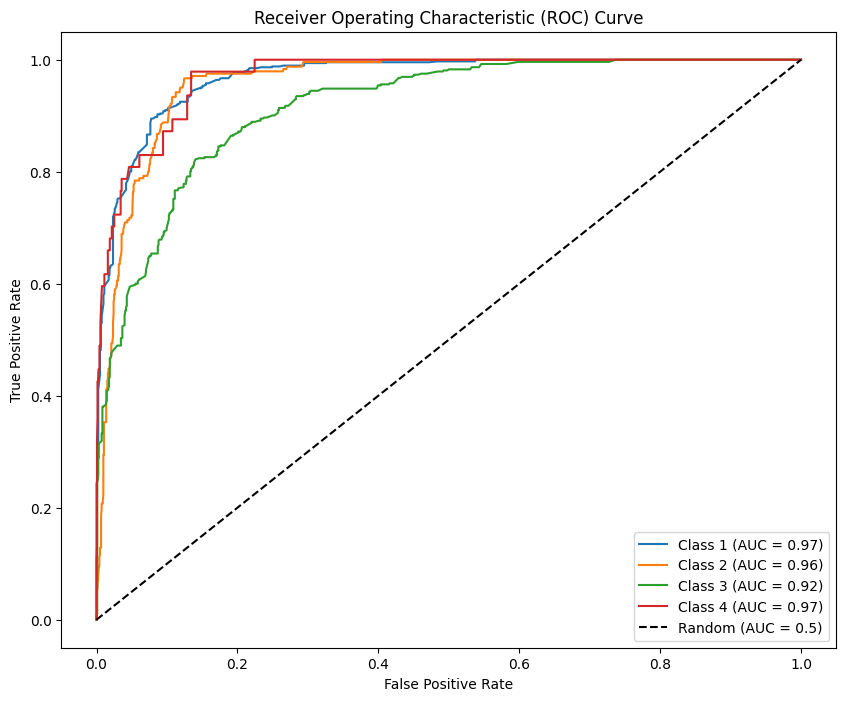

In [5]:
fpr = {}
tpr = {}
roc_auc = {}


for i in range(len(y_unique)): 
    fpr[i], tpr[i], _ = roc_curve(y_test == y_unique[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC
plt.figure(figsize=(10, 8))
for i in range(len(y_unique)):
    plt.plot(fpr[i], tpr[i], label=f'Class {y_unique[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Plot Confusion Matrix

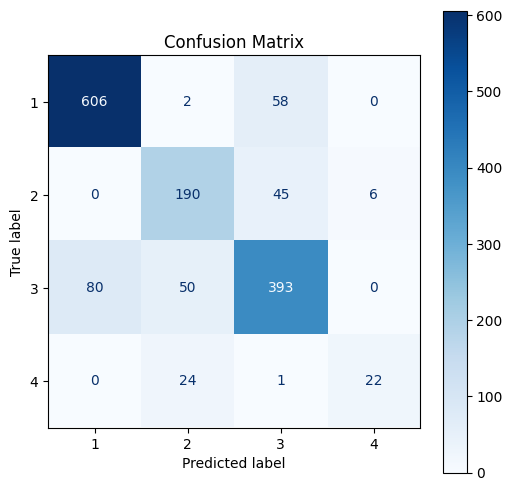

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()